<a href="https://colab.research.google.com/github/jcandane/PhysicsI_Labs/blob/main/phy_122_errorprop2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Stuff

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from numpy.random import normal as random_normal
from numpy import arange, sort, searchsorted, exp, sqrt
from numpy import sum as Σ

π = np.pi

def Normal(x, μ, σ):
    ## a.k.a. Gaussian-function given: domain x and two parameters μ, σ
    return exp( - (x-μ)**2/(2*σ**2) ) / sqrt(2*π*σ**2)

def get_histogram(x, data, normalize=False):
    ### binary-search of sorted data for-all domains.
    ### let: N = len(data), then: O ~ (N + len(x))log(N)
    out = searchsorted( sort(data), x, side="right")
    if normalize:
        return x[1:] + (x[:-1] - x[1:])/2, (out[1:] - out[:-1])/len(data)
    return x[1:] + (x[:-1] - x[1:])/2, out[1:] - out[:-1]

def ExpectationValue(X):
    return np.sum(X)/len(X)

def RMSD(f1, f2):
    """
    Root-Mean-Square-Deviation
    compare two functions
    """
    return sqrt( (  Σ( (f1 - f2)**2 )  ) / (len(f1)) )

# Gaussian-Functions

Plot 3 Gaussian-functions using the above defintion

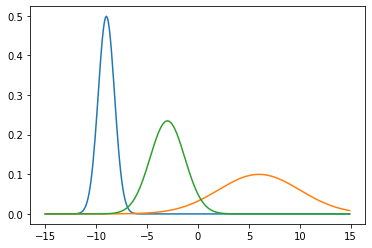

In [2]:
dx = 0.1
x  = arange(-15,15,dx)

plt.plot( x , Normal(x,-9.0, 0.8) )
plt.plot( x , Normal(x, 6.0, 4.0) )
plt.plot( x , Normal(x,-3.0, 1.7) )
plt.show()

# Random Variables

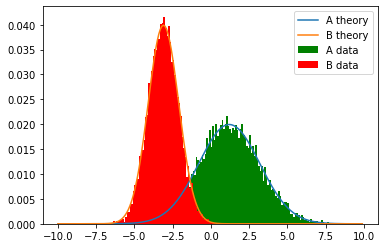

In [3]:
## Gaussian-function parameters
μ1 =  1.2
σ1 =  2.0
μ2 = -3.1
σ2 =  1.0

## domain
dx = 0.1
x  = arange(-10,10,dx)

## define random variables
N = 10000 ## number of samples collected
A = random_normal(μ1, σ1, N) ## random variable A
B = random_normal(μ2, σ2, N) ## random variable B

## make histograms of the random variables
y, hA = get_histogram(x, A, normalize=True)
y, hB = get_histogram(x, B, normalize=True)

## plot histograms with overlied continuous representation
plt.bar(  y , hA, label="A data", color="g", width=0.10)
plt.bar(  y , hB, label="B data", color="r", width=0.10)
plt.plot( x , Normal(x, μ1, σ1) * dx, label="A theory")
plt.plot( x , Normal(x, μ2, σ2) * dx, label="B theory")
plt.legend()
plt.show()

# $f = aA$

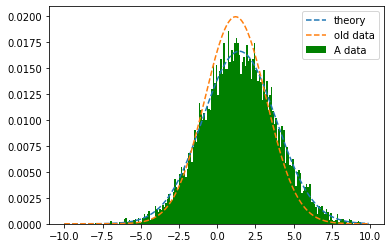

0.0007154211239778447

In [4]:
a = 1.2 ## constant

bins, hA = get_histogram(x, a*A, normalize=True)
σ     = sqrt(a**2 * σ1**2)
μ     = a * μ1

plt.bar(bins, hA, label="A data", color="g", width=0.10)
plt.plot(x, Normal(x, μ, σ)   * dx, linestyle="dashed", label="theory")
plt.plot(x, Normal(x, μ1, σ1) * dx, linestyle="dashed", label="old data")
plt.legend()
plt.show()

RMSD(Normal(bins, μ, σ)*dx, hA)

# $f = A + B$

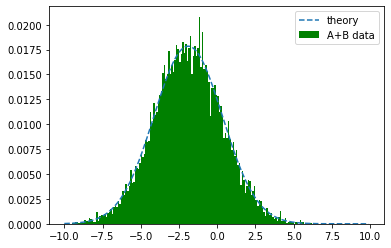

0.0007039107307809138

In [5]:
bins, hAB = get_histogram(x, A+B, normalize=True)

σ = sqrt(σ1**2 + σ2**2)
μ = μ1 + μ2

plt.bar( bins , hAB, label="A+B data", color="g", width=0.10)
plt.plot(x, Normal(x, μ, σ) * dx, linestyle="dashed", label="theory")
plt.legend()
plt.show()

RMSD(Normal(bins, μ, σ)*dx, hAB)

# $f = aA + bB$

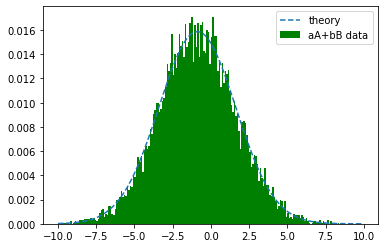

0.0006861513877432033

In [6]:
## constants considered
a = 1.20
b = 0.75

bins, hAB = get_histogram(x, a*A+b*B, normalize=True)
μ = a*μ1 + b*μ2
σ = sqrt( a**2 * σ1**2 + b**2 * σ2**2 )   ## error propagation here

## plot
plt.bar( bins , hAB, label="aA+bB data", color="g", width=0.10)
plt.plot(x, Normal(x, μ, σ) * dx, linestyle="dashed", label="theory")
plt.legend()
plt.show()

RMSD(Normal(bins, μ, σ)*dx, hAB)

# $f = AB$

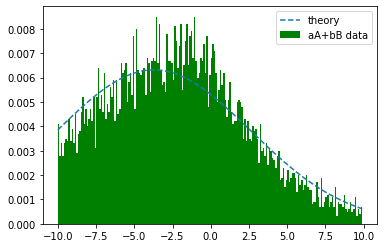

0.0008512769502225817

In [7]:
bins, hAB = get_histogram(x, A*B, normalize=True)
μ = μ1 * μ2
σ = sqrt( μ**2 * ((σ1/μ1)**2 + (σ2/μ2)**2) )   ## error propagation here

plt.bar( bins , hAB, label="aA+bB data", color="g", width=0.10)
plt.plot(x, Normal(x, μ, σ) * dx, linestyle="dashed", label="theory")
plt.legend()
plt.show()

RMSD(Normal(bins, μ, σ)*dx, hAB)

# DiY

### go to the table: https://en.wikipedia.org/wiki/Propagation_of_uncertainty#Example_formulae and implement one of the **non-linear** entries. Just like the previous 'experiments'. Note that you will be computing the relative error.

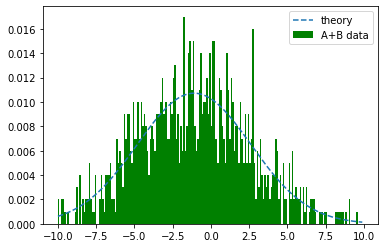

0.0021650392724480664

# Questions \& Conclusion

## Give a summary of what you did in this lab.